<a href="https://colab.research.google.com/github/labudzki/BasicModelsofBiologicalNetworks/blob/main/ODEs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Ordinary Differential Equations (ODEs)

---

Differential equations differ from other equation types by the fact that they include terms related to the **rate of change** of some of its variables.

When you see
$$
\frac{dx}{dt} = 3x
$$

you can read it as: the rate of change of $x$, with respect to $t$, is proportional to $x$. To solve this equation is to find a function $x(t)$ where at each point its derivative (rate of change) respects this rule.

## Euler method for solving ODEs

The Euler method provides a first order approximation for the solution of an ODE. It is conceptually very simple: we will use the differential equation as a recipe to contruct the function which is its solution. Since we know how the variable changes, we can just start somewhere and keep changing the

Here is how it's done for an ODE of the shape
$$
\frac{dx}{dt} = f(x,t)
$$
1. We pick a point to start, e.g. $(x,t)$.
2. The differential equation will tell us the rate of change at that point.
3. We then apply this rate of change for a small distance $h$.
4. We arrive at a new point $t_{\text{next}} = t+h$ and $x_{\text{next}} = x+ h\cdot f(x,t)$.
5. Go back to step 2.
5. We repeat this for as long as we need.

You can see this process visualized below:

Euler_method.svg

## Implementing the Euler method.

You will now implement the Euler method in python.
We first have to write down the differential equation as a Python function, and we again have a useful convention. If we have an ODE of the form
$$
\frac{dx}{dt} = f(x,t)
$$
we only write the right-hand part of the equation in the python function, and we already know how to write mathematical functions in python, exept here we need to introduce another rule, to make explicit which is the independent variable, since that is only clear on the left-hand part of the equation.

The function is then writen as ``f(t,x)``, **with $t$ as the first argument**, to make explicit that $t$ is the independent variable.

One example:
$$
\frac{dx}{dt} = 3x
$$

becomes
```python
def my_ode(t,x):
  y = 3x
  return y
```

on which I can input any point $(x,t)$ to get back the rate of change at that point, with respect to $t$.

We can now use this to implement Euler's method in python, which you will do next

### Exercise

1. Implement Euler's method as a python function. The function should take as an input:
* The function ``func(t,x)`` that defines the ODE.
* The initial values of $x$ and $t$
* The step size $h$
* The final time $t$ on which to stop the algorithm.

And the function should return two vectors, one with the $x$ values, and one with the $t$ values, from which you can plot your results. So it should look something like:

```python
def euler_method(fun, x_init, t_init, h, t_end):
  # your code here
  return x_sol, t_sol
```

2. Write down the following ODE as a python function:

$$
\frac{dx}{dt} = x\left(1-\frac{x}{10}\right)
$$

3. Use your implementation of the Euler method to solve this equation, and plot it's result. Use $x(0)=1$ as your initial point, and $t=10$ as end point. Test different values of $h$.

4. The exact solution to this equation is

$$
x(t) = \frac{10\cdot x_0 \cdot e^t}{(10-x_0) + x_0 \cdot e^t}
$$

where $x_0 = x(0)$ is the initial value of $x$. Plot this function, together with your numerical solution above. Again, test different values of $h$. Comment on the results.




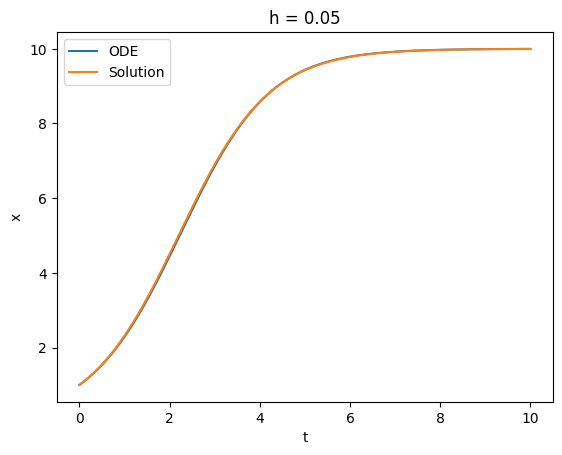

In [14]:
def euler_method(fun, x_i, t_i, h, t_f):
  x_sol = [x_i]
  t_sol = [t_i]

  num_steps = int((t_f - t_i) / h)
  # print(f'num steps: {num_steps}')

  for ii in range(num_steps):
    t_next = t_i + (ii+1)*h   #Current time
    x_next = x_i + h * fun(x_i, t_next)

    x_sol.append(x_next)
    t_sol.append(t_next)

    # print(f"Iteration {ii+1}: t = {round(t_next,3)}, x = {round(x_next,3)}")

    x_i = x_next
    # t_i = t_next

  return x_sol, t_sol

def my_ode_1(x, t):
  y = x * (1 - x/10)
  return y

def solution_function(x0, t):
  num = 10 * x0 * np.exp(t)
  denom = (10 - x0) + x0 * np.exp(t)
  y = num / denom
  return y

x_i = 1
t_i = 0
t_f = 10

# # Trying out dif h values
# h_vec = [0.1, 1, 2]
# for h in h_vec:
#   my_sol_x, my_sol_t = euler_method(my_ode_1, x_i, t_i, h, t_f)
#   # my_sol2_x, my_sol2_t = euler_method(solution_function, x_i, t_i, h, t_f)
#   y = solution_function(x_i, t_i)

#   # Round for conciseness
#   # my_sol_x_r = [round(x, 3) for x in my_sol_x]
#   # my_sol_t_r = [round(t, 3) for t in my_sol_t]

#   # Print solutions
#   # print(f'x_sol for h = {h}: ', my_x_sol_r)
#   # print(f't_sol for h = {h}: ', my_t_sol_r)

#   plt.plot(my_sol_t, my_sol_x, label = 'ODE')
#   plt.plot(my_sol2_x, y, label = 'Solution')
#   plt.xlabel('t')
#   plt.ylabel('x')
#   plt.title(f'h = {h}')
#   plt.legend()
#   plt.show()

# Plot these points and fit a function to it

h=0.05
my_sol_x, my_sol_t = euler_method(my_ode_1, x_i, t_i, h, t_f)
# each y is the solution to x_i and each time?
y_array = []
for t in my_sol_t:
  y = solution_function(x_i, t)
  y_array.append(y)

plt.plot(my_sol_t, my_sol_x, label = 'ODE')
plt.plot(my_sol_t, y_array, label = 'Solution')
plt.xlabel('t')
plt.ylabel('x')
plt.title(f'h = {h}')
plt.legend()
plt.show()




## Solving a system of ODEs

Several ODEs can be combined into a system of equations, and if they all share the same independent variable (e.g. time) they can be solved together.

Let's look at an example of a ODE system:

$$
\frac{dx}{dt} = x - xy \\
\frac{dy}{dt} = -y + xy
$$

This system gives us the rate of change for the variables $x$ and $y$, with respect to time, for any value of $x$ and $y$. This was one of the earlies models of an ecosystem, know as the [Lotka–Volterra model](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations).

To see how this can also be solved using the Euler method, let's write this system as a python function:


In [ ]:
def lotka_volterra(t,x):
  a = x[0] - x[0] * x[1]
  b = -x[1] + x[0]*x[1]
  return [a,b]

lotka_volterra(0,[10,10])

[0, 90]

### Exercise
1. Expand your Euler method so that it is able to handle two variables as inputs.
2. Use your expanded method to solve the system define above. Use $(x=5,y=5,t=0)$ as the initial point, and $t=20$ as the end point. Choose a small enough value of $h$.
3. Plot your results. What do you see?

## More complex solvers

There exist many other ways to solve ODEs numerically, which provide better approximations for the exact solution. Here, we will not explain or implement them, rather we will learn to use Scipy's own implementations.

The relevant Scipy function is ``scipy.integrate.solve_ivp``. IVP stands for Inintial Value Problem, a class of ODEs that are solved by providing it with an initial point.

Here is how this function is called:

```python
sol = sp.integrate.solve_ivp(fun, t_span, y0)
```
* **fun** is the ODE or ODE system as defined above.
* **t_span** is the time span where the equation will be solved, it includes both the initial time and final time as folows: ``[t_ini, t_final]``
* **y0** is the initial value of the dependent variables.

Onece this is run, you will get back a solution object. The most important variables on this object are t and y, which will similarly give you the poits to reconstruct the function. An example on how to access them:

```python
sol = sp.integrate.solve_ivp(fun, t_span, y0)
y = sol.y
t = sol.t
```

You might have noticed that you do not need to provide a value of $h$, or any parameter that controls precision. That's because the algorithm will try to calculate the best $h$ that will give you the best compromise between precision and computation time. If you are not satisfied with the resolution provided by this choice, you can use the **t_eval** parameter, providing it with a list of all time points where the solution is evaluated (can be created using numpy's *linspace* function).



### Exercise

1. Use Scipy's solver to again find the solution to the following ODE, and compare it to the previous solution using the Euler method.
$$
\frac{dx}{dt} = x\left(1-\frac{x}{10}\right)
$$

2. Use the Scipy solver to find the solution to the Lotka-Volterra method above, and adjust the **t_eval** input until you are satisfied with the resolution of your solution.

3. Now, make a plot of the solution with $x$ in the horizontal axis, and $y$ on the vertical axis.
  * In the same plot, add the solution for the following initial conditions: $(10,10)$, $(3,3)$ and $(1,1)$.